In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# reading the data file
eeg_df = pd.read_csv('eeg_data_1.csv')

In [3]:
# first 5 lines of the data 
eeg_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
# removing and storing the class attribute for later use
Class = list(eeg_df.pop('y'))

In [5]:
# Extracting the measurements as a numpy array
samples = eeg_df.values

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=5)

In [132]:
kmeans.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
kmeans.labels_

array([3, 0, 3, ..., 0, 3, 0])

Text(0.5,1,'K Means')

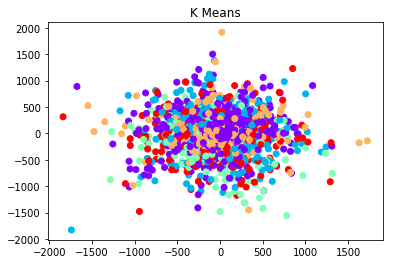

In [135]:
plt.scatter(samples[:,0],samples[:,177],c=kmeans.labels_,cmap='rainbow')
plt.title("K Means")

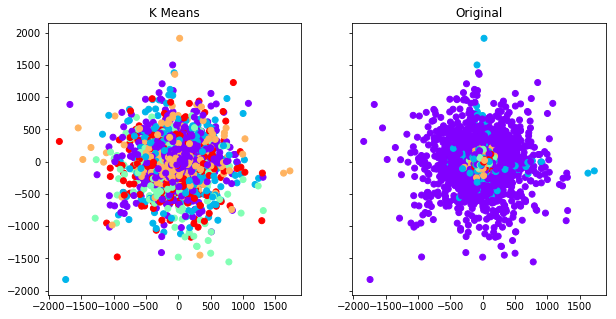

In [137]:
#To visualise real clusters and idetified clusters, plot them together
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5))

ax1.set_title('K Means')
ax1.scatter(samples[:,0],samples[:,177],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(samples[:,0],samples[:,177],c=Class,cmap='rainbow')

In [148]:
# Class =1 Ictal Data ; Has much higher voltage values as plotted separately
eeg_1 = pd.read_csv('eeg_class1.csv')

In [149]:
Class1 = list(eeg_1.pop('y'))

In [150]:
s1 = eeg_1.values

In [151]:
eeg_2 = pd.read_csv('eeg_class2.csv')

In [152]:
Class2 = list(eeg_2.pop('y'))

In [153]:
s2 = eeg_2.values

In [173]:
eeg_3 = pd.read_csv("eeg_class3.csv")
Class3 = list(eeg_3.pop('y'))
s3 = eeg_3.values

In [184]:
eeg_4 = pd.read_csv("eeg_class4.csv")
Class4 = list(eeg_4.pop('y'))
s4 = eeg_4.values

In [185]:
eeg_5 = pd.read_csv("eeg_class5.csv")
Class5 = list(eeg_5.pop('y'))
s5 = eeg_5.values

Text(0.5,1,'5:eyes open')

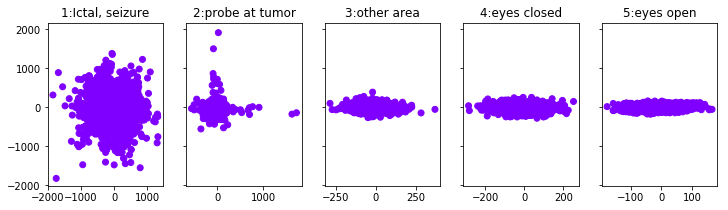

In [189]:
#To visualise real clusters and idetified clusters, plot them together
f, (ax3, ax4, ax5, ax6, ax7)= plt.subplots(1, 5, sharey=True,figsize=(12,3))

ax3.set_title('1:Ictal, seizure')
ax3.scatter(s1[:,0],s1[:,177],c=Class1,cmap='rainbow')
ax4.set_title("2:probe at tumor")
ax4.scatter(s2[:,0],s2[:,177],c=Class2,cmap='rainbow')
ax5.scatter(s3[:,0],s3[:,177],c=Class3,cmap='rainbow')
ax5.set_title("3:other area")
ax6.scatter(s4[:,0],s4[:,177],c=Class4,cmap='rainbow')
ax6.set_title("4:eyes closed")
ax7.scatter(s5[:,0],s5[:,177],c=Class5,cmap='rainbow')
ax7.set_title("5:eyes open")

In [56]:
# Normalizing all class data
norm_samples = normalize(samples)

In [101]:
# Hirearchical analogue of K-means clustering with the normalized data
mergings_norm = linkage(norm_samples, method='ward')

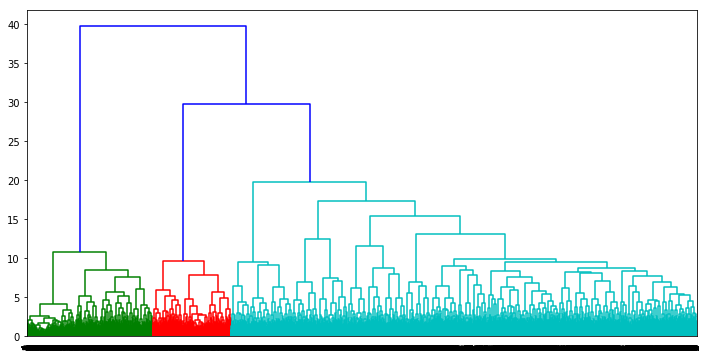

In [102]:
plt.figure(figsize=(12,6))
dendrogram(mergings_norm, labels=Class, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [ ]:
# comment: at level 15 there are 5 large nested clusters

In [158]:
kmeans2 = KMeans(n_clusters=5)

In [159]:
# Investigating KMeans clustering on normalized data
kmeans2.fit(norm_samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [160]:
kmeans2.labels_

array([3, 4, 1, ..., 4, 1, 4])

Text(0.5,1,'K Means_Normalized')

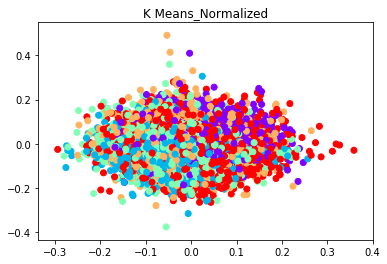

In [161]:
plt.scatter(norm_samples[:,0],norm_samples[:,177],c=kmeans2.labels_,cmap='rainbow')
plt.title("K Means_Normalized")

In [124]:
eeg_nonictal = pd.read_csv('class_nonictal.csv')

In [125]:
Class_nonictal = list(eeg_nonictal.pop('y'))

In [126]:
sample_nonictal = eeg_nonictal.values

In [162]:
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=4)
kmeans_2.fit(sample_nonictal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [163]:
kmeans_2.labels_

array([0, 3, 2, ..., 3, 3, 3])

Text(0.5,1,'K Means Nonictal')

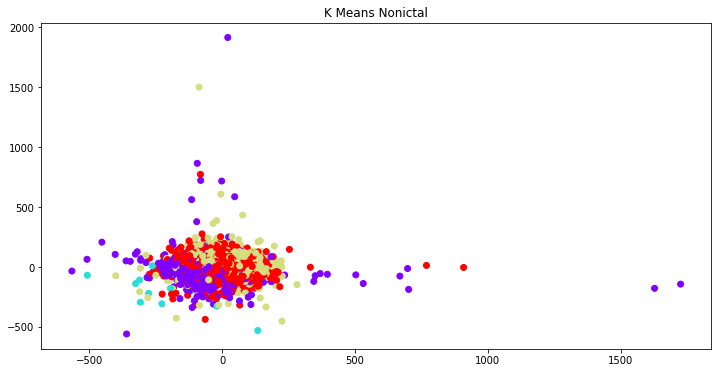

In [164]:
plt.figure(figsize=(12,6))
plt.scatter(sample_nonictal[:,0],sample_nonictal[:,177],c=kmeans_2.labels_,cmap='rainbow')
plt.title("K Means Nonictal")

In [165]:
# Normalizing the non-ictal classes 2, 3, 4, 5
norm_nonictal = normalize(sample_nonictal)

In [167]:
kmeans_non = KMeans(n_clusters=4)

In [168]:
# KMeans clustering of normalized non-ictal data
kmeans_non.fit(norm_nonictal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [169]:
kmeans_non.labels_

array([1, 1, 2, ..., 0, 2, 3])

Text(0.5,1,'nonictal Classes')

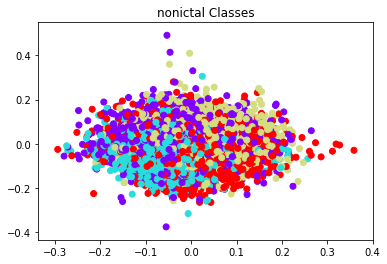

In [170]:
plt.scatter(norm_nonictal[:,0],norm_nonictal[:,177],c=kmeans_non.labels_,cmap='rainbow')
plt.title("nonictal Classes")

In [171]:
# Investigating nesting by hirearchical analogue of KMeans on normalized non-ictal data
mergings_nonictal = linkage(norm_nonictal, method='ward')

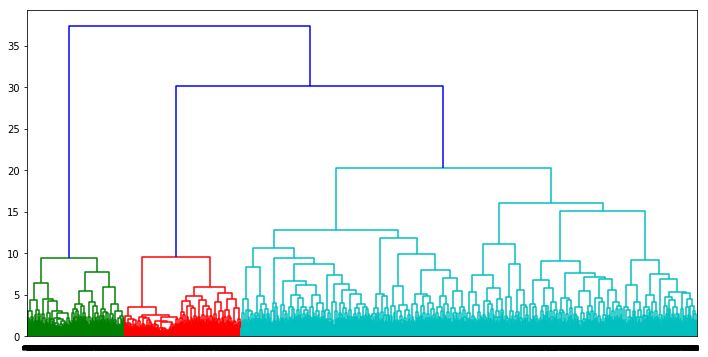

In [172]:
plt.figure(figsize=(12,6))
dendrogram(mergings_nonictal, labels=Class_nonictal, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [190]:
# at level 15 there are 4 nested clusters
# The data can be viewed as a nested cluster. However it is not good for clustering studies
# End